# Imports

In [73]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [74]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


# Creating and loading data

In [75]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [76]:
#Split data into train and test
train_size = int(0.8 * len(X))
test_size = len(X) - train_size
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]
len(train_X), len(test_X), len(train_y), len(test_y)

(40, 10, 40, 10)

In [77]:
def plot_predictions(train_data=train_X, 
                     train_labels=train_y, 
                     test_data=test_X, 
                     test_labels=test_y, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

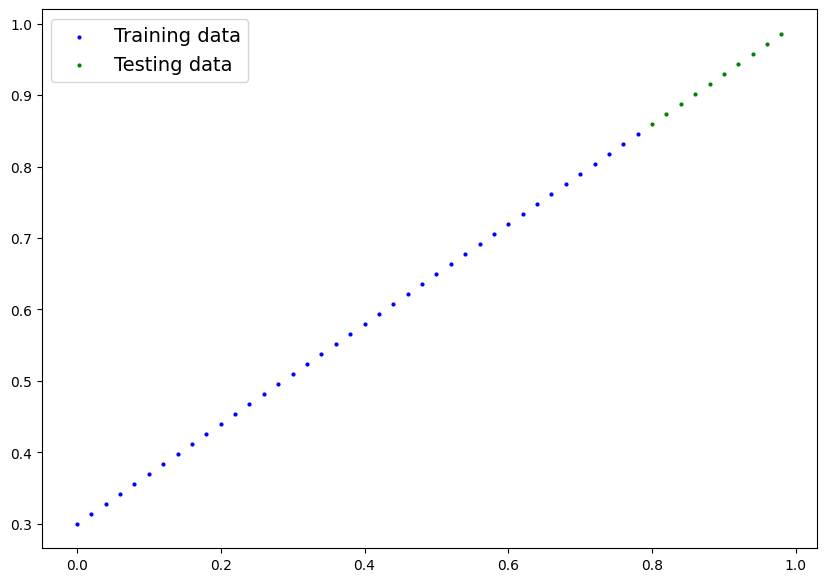

In [7]:
plot_predictions()

# Linear Regression Model

In [80]:
class LinearRegressionModel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias # y = wx + b

In [81]:
# Uses linear layer from PyTorch
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear(x)

## Essential Functions in Pytorch
- torch.nn
- torch.optim
- torch.utils.data.Dataset  
- torch.utils.data.DataLoader

https://www.learnpytorch.io/01_pytorch_workflow/#pytorch-model-building-essentials 

In [82]:
torch.manual_seed(42)

model = LinearRegressionModel1()

print("List of model Parameteres: ",list(model.parameters()))
print("\nModel state dict: ",model.state_dict())

List of model Parameteres:  [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

Model state dict:  OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [83]:
# Inferencing
with torch.inference_mode():
    y_preds = model(test_X)
    print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [84]:
# Check the predictions
print(f"Number of testing samples: {len(test_X)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


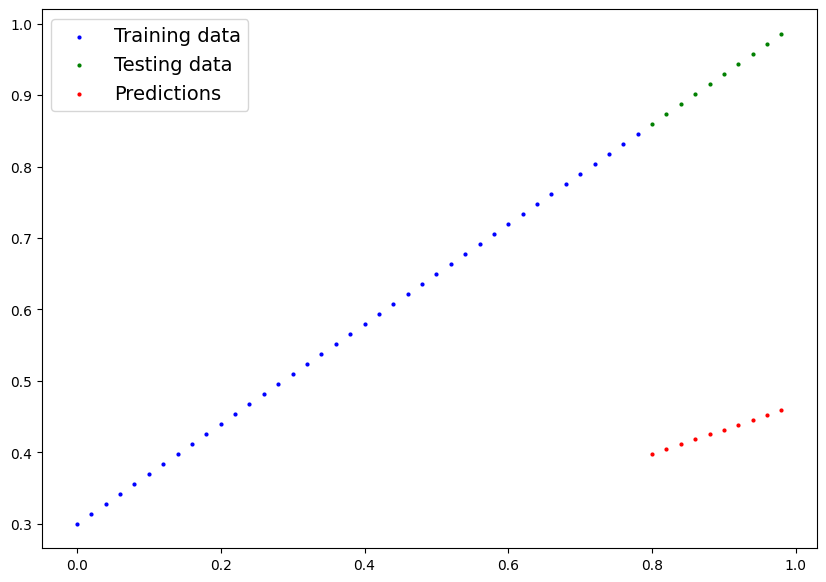

In [85]:
plot_predictions(predictions=y_preds)

# Training model: 
## Using Linear Regression Model 1 

In [86]:
# Moving parameters to GPU
model = LinearRegressionModel1().to(device)

In [87]:
# Loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [88]:
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# pushing data to GPU
train_X = train_X.to(device)
train_y = train_y.to(device)
test_X = test_X.to(device)
test_y = test_y.to(device)

# Train the model
for epoch in range(epochs):

    model.train()

    y_pred = model(train_X)
    loss = loss_fn(y_pred, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Eval mode
    model.eval()

    with torch.inference_mode():
      test_pred = model(test_X)

      test_loss = loss_fn(test_pred, test_y.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.25122663378715515 | MAE Test Loss: 0.470524400472641 
Epoch: 20 | MAE Train Loss: 0.09095562994480133 | MAE Test Loss: 0.2517372965812683 
Epoch: 40 | MAE Train Loss: 0.06757690757513046 | MAE Test Loss: 0.17111757397651672 
Epoch: 60 | MAE Train Loss: 0.05999922752380371 | MAE Test Loss: 0.14298436045646667 
Epoch: 80 | MAE Train Loss: 0.05305762216448784 | MAE Test Loss: 0.12300487607717514 


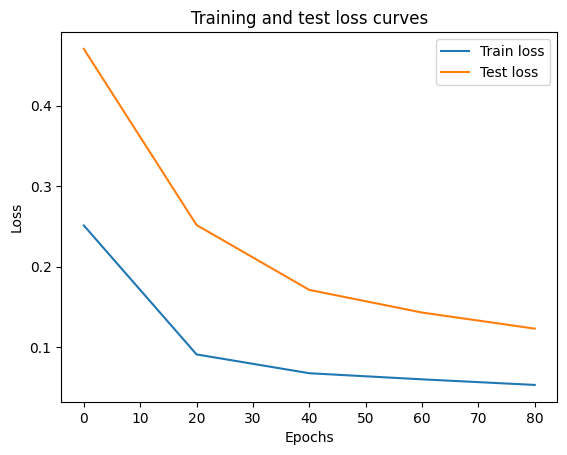

In [89]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [90]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([0.4701])), ('bias', tensor([0.3963]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [91]:
model.eval()

with torch.inference_mode():
    y_preds = model(test_X)
    print(y_preds)

tensor([[0.7724],
        [0.7818],
        [0.7912],
        [0.8006],
        [0.8101],
        [0.8195],
        [0.8289],
        [0.8383],
        [0.8477],
        [0.8571]])


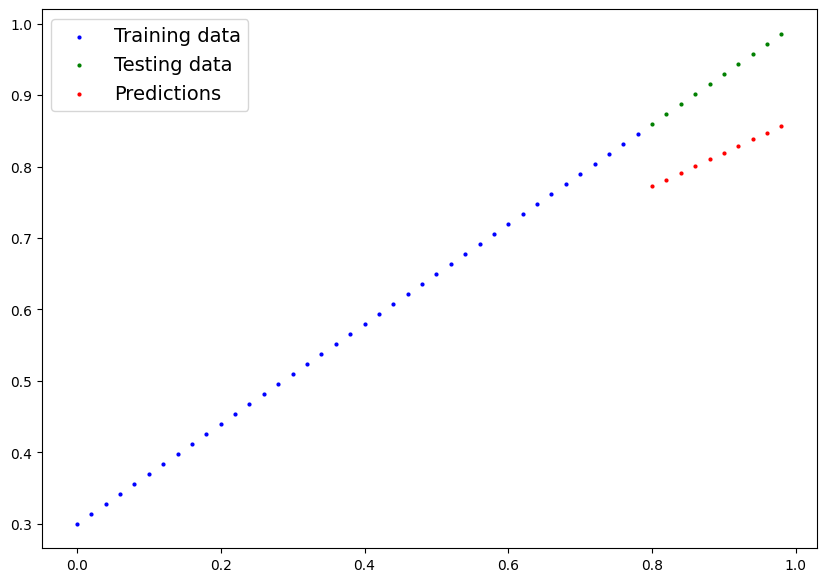

In [92]:
plot_predictions(predictions=y_preds)

# Saving and loading model

In [93]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "fundamentals_lr_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), 
           f=MODEL_SAVE_PATH) 

Saving model to: models/fundamentals_lr_model.pth


#### Saving model vs State_dict
Saving entire model might break code after refactoring or when used in new projects as the serialized data is bound to the specific classes and the exact directory structure used when the model is saved.

In [94]:
# Check the saved file path
!ls -l models/fundamentals_lr_model.pth

-rw-rw-rw- 1 codespace codespace 1119 Apr 13 19:46 models/fundamentals_lr_model.pth


In [95]:
### Loading saved model
loaded_model = LinearRegressionModel1()

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)
print(loaded_model.state_dict())

OrderedDict([('weight', tensor([0.4701])), ('bias', tensor([0.3963]))])


In [98]:
# Evaluate loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(test_X)
print(y_preds == loaded_model_preds)


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


# Exercises

#### Was very similar to code done during the tutorial: so I didn't do anything here :)